In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-01-11 02:02:18--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-01-11 02:02:18 (8.23 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
#buat dataframe
df=pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

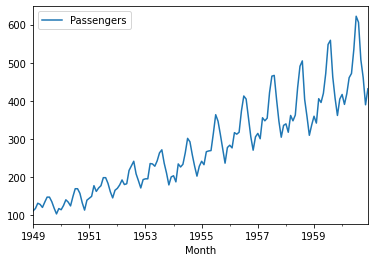

In [ ]:
#buat plot
df.plot()

In [ ]:
#buat adfuller
adfuller(df['Passengers'])

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [ ]:
# kembalikan 2 nilai sebagai test-statistic dan p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html 

In [ ]:
#buat fungsi
def adf(x):
  res=adfuller(x)
  print("Test-statistic:",res[0])
  print("P-value:",res[1])
  if res[1]<0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [ ]:
#tes fungsi
adf(df['Passengers'])

Test-statistic: 0.8153688792060418
P-value: 0.9918802434376409
Non-Stationary


In [ ]:
#tes fungsi dgn nilai random
adf(np.random.randn(100))

Test-statistic: -7.8654788261366155
P-value: 5.148544762262429e-12
Stationary


In [ ]:
#tes fungsi dgn gamma random
adf(np.random.gamma(1, 1, 100))

Test-statistic: -9.47639288330774
P-value: 3.9790171465819106e-16
Stationary


In [ ]:
#buat kolom baru
df['LogPassengers']=np.log(df["Passengers"])
df['Diff']=df['Passengers'].diff()
df['LogDiff']=np.log(df['Diff'])
df['DiffLogPassengers']=df['LogPassengers'].diff()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#display df
df

,Passengers,LogPassengers,Diff,LogDiff,DiffLogPassengers
Month,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN
1949-02-01,118,4.770685,6.0,1.791759,0.052186
1949-03-01,132,4.882802,14.0,2.639057,0.112117
1949-04-01,129,4.859812,-3.0,NaN,-0.022990
1949-05-01,121,4.795791,-8.0,NaN,-0.064022
...,...,...,...,...,...
1960-08-01,606,6.406880,-16.0,NaN,-0.026060
1960-09-01,508,6.230481,-98.0,NaN,-0.176399
1960-10-01,461,6.133398,-47.0,NaN,-0.097083


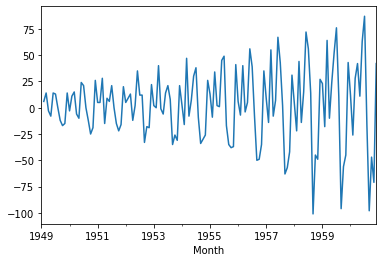

In [ ]:
#buat plot untuk kolom diff
df['Diff'].plot()

In [ ]:
#tes fungsi dgn kolom diff yang dihapus
adf(df['Diff'].dropna())

Test-statistic: -2.829266824169997
P-value: 0.05421329028382577
Non-Stationary


In [ ]:
#tes fungsi dgn kolom difflogpassengers yang dihapus
adf(df['DiffLogPassengers'].dropna())

Test-statistic: -2.7171305983881044
P-value: 0.07112054815086355
Non-Stationary


In [ ]:
#download file
!wget -nc https://www.lazyprogrammer.me/course_files/sp500sub.csv

--2022-01-11 02:02:54--  https://www.lazyprogrammer.me/course_files/sp500sub.csv
Resolving www.lazyprogrammer.me (www.lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to www.lazyprogrammer.me (www.lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lazyprogrammer.me/course_files/sp500sub.csv [following]
--2022-01-11 02:02:54--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  13.4MB/s    in 1.8s    

2022-01-11 02:02:57 (13.4 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
#buat dataframe stock
stock=pd.read_csv("sp500sub.csv", index_col='Date', parse_dates=True)

#display 5 teratas dataframe stock
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
#buat dataframe goog dgn kondisi sbb
goog=stock[stock['Name']=='GOOG'][['Close']] #hanya mengambil kolom close

#display 5 teratas dataframe goog
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [ ]:
#buat kolom baru
goog['LogPrice']=np.log(goog['Close'])
goog['LogRet']=goog['LogPrice'].diff()

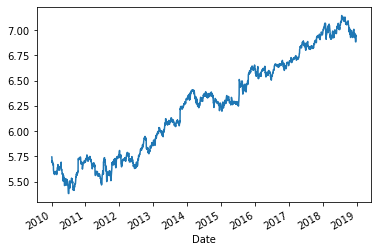

In [ ]:
#buat plot untuk logprice
goog['LogPrice'].plot()

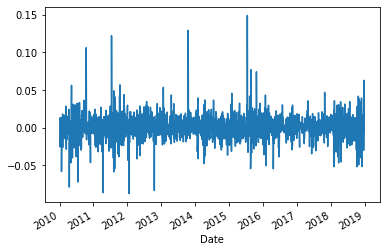

In [ ]:
#buat plot untuk logret
goog['LogRet'].plot()

In [ ]:
#buat dataframe sbux dgn kondisi sbb
sbux = stock[stock['Name'] == 'SBUX'][['Close']]

#buat kolom baru
sbux['LogPrice']=np.log(sbux['Close'])
sbux['LogRet']=sbux['LogPrice'].diff()

#display 5 teratas sbux datafra,e
sbux.head()

,Close,LogPrice,LogRet
Date,,,
2010-01-04,11.525,2.444519,NaN
2010-01-05,11.795,2.467676,0.023157
2010-01-06,11.710,2.460443,-0.007233
2010-01-07,11.680,2.457878,-0.002565
2010-01-08,11.640,2.454447,-0.003431


In [ ]:
# tes fungsi adf dgn kolom LogRet dihapus
adf(sbux['LogRet'].dropna())

Test-statistic: -30.086501426958073
P-value: 0.0
Stationary


In [ ]:
# tes fungsi adf dgn kolom LogPrice dihapus
adf(sbux['LogPrice'].dropna())

Test-statistic: -1.9020133583900012
P-value: 0.3311145569853755
Non-Stationary


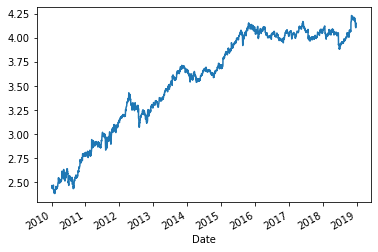

In [ ]:
#buat plot
sbux['LogPrice'].plot()